In today’s rapidly changing environment, climate change is no longer just an ecological concern—it is a critical business and economic challenge. Companies, policymakers, and investors need data-driven insights to assess climate risks, understand economic vulnerabilities, and develop strategies for sustainability and resilience.



### Climate Change Impact Analysis

#### Climate Data Final Dataset 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Load dataset
file_path = r"..\Data\Climate Change - datasets\climate_data_final_df.csv"
climate_merged_df = pd.read_csv(file_path,index_col=0)
climate_merged_df.head()

,Entity,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,280000.0,320000.0,...,320000.0,280000.0,0.0,20000.0,0.168054,12.222920,-22.847396,1.852782,12045660.0,23.0
1,Afghanistan,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,240000.0,300000.0,...,300000.0,240000.0,0.0,20000.0,0.156411,11.212434,-22.814062,1.852782,12238879.0,23.7
2,Afghanistan,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,200000.0,...,200000.0,200000.0,0.0,20000.0,0.111609,10.987166,-20.247396,1.852782,13278974.0,27.4
3,Afghanistan,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,160000.0,200000.0,...,200000.0,160000.0,0.0,20000.0,0.099507,11.510678,-22.780729,1.852782,14943172.0,28.5
4,Afghanistan,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,120000.0,190000.0,...,190000.0,120000.0,0.0,20000.0,0.089462,11.846118,-17.980729,1.852782,16250794.0,30.1


In [ ]:
# Checking the shape
climate_merged_df.shape

(6323, 28)

In [ ]:
# Checking the datatypes 
climate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              6323 non-null   object 
 1   Year                                                                6323 non-null   int64  
 2   Carbon dioxide emissions from buildings                             6323 non-null   float64
 3   Carbon dioxide emissions from industry                              6323 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 6   Carbon dioxide emissions from transport                             6323 non-null   float64
 7   Carbon dioxide emiss

In [ ]:
# checking the summary statistics
climate_merged_df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
count,6323.000000,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,...,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6323.000000,5527.000000,6323.000000,6193.000000,6.323000e+03,6264.000000
mean,2005.529654,5.575472e+07,2.125237e+07,2.690093e+07,1.261191e+07,1.180319e+08,1.026921e+08,6.097247e+06,2.549890e+08,1.958448e+07,...,2.560967e+08,5.544787e+07,1.286635e+07,1.976765e+07,4.748857,19.029716,19.408416,33.460063,1.220099e+08,33.510529
std,9.219966,2.544587e+08,1.185633e+08,2.509279e+08,5.805679e+07,5.829772e+08,5.192009e+08,2.587100e+07,1.225914e+09,9.560421e+07,...,1.231280e+09,2.544258e+08,5.926866e+07,9.650206e+07,7.899655,8.089890,29.163940,24.244169,5.723961e+08,30.427138
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-4.969122,-22.847396,0.000000,8.798000e+03,0.000000
25%,1998.000000,8.000000e+04,1.000000e+04,-7.650000e+05,0.000000e+00,6.200000e+05,1.600000e+05,0.000000e+00,2.200000e+05,7.000000e+04,...,2.200000e+05,0.000000e+00,0.000000e+00,7.000000e+04,0.600898,11.812214,-2.647396,12.160463,2.157018e+06,6.563883
50%,2006.000000,6.600000e+05,4.700000e+05,8.000000e+04,2.500000e+05,3.210000e+06,1.530000e+06,1.500000e+05,3.920000e+06,5.600000e+05,...,3.940000e+06,3.900000e+05,2.700000e+05,5.700000e+05,2.298188,22.619158,14.619271,32.107530,8.365878e+06,24.450000
75%,2014.000000,7.360000e+06,2.865000e+06,1.056000e+07,2.030000e+06,1.827000e+07,1.326500e+07,1.920000e+06,3.344500e+07,3.215000e+06,...,3.357500e+07,9.020000e+06,2.070000e+06,3.250000e+06,6.635468,25.580124,50.461706,51.646391,2.881387e+07,57.525000
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09,...,1.630219e+10,3.336260e+09,7.686300e+08,1.338160e+09,364.688320,29.794220,66.704325,96.226381,7.921184e+09,98.300000


In [ ]:
# Checking for duplicates
print("Number of duplicates:",climate_merged_df.duplicated().sum())

Number of duplicates: 0


In [ ]:
# Check for missing values
missing_values = climate_merged_df.isnull().sum().sort_values(ascending=False)
# missing values as percentage
missing_values_percent = (missing_values/len(climate_merged_df)*100)

missing_summary = pd.DataFrame({"missing values": missing_values,
             "missing values percent":missing_values_percent
             })
missing_summary

,missing values,missing values percent
Average Temperature,796,12.588961
Forest area (% of land area),130,2.055986
Renewable energy consumption (% of total final energy consumption),59,0.933101
Year,0,0.000000
"Population, total",0,0.000000
mmfrom1993-2008average,0,0.000000
Annual CO₂ emissions (per capita),0,0.000000
Greenhouse gas emissions from bunker fuels,0,0.000000
Greenhouse gas emissions from other fuel combustion,0,0.000000
Fugitive emissions of greenhouse gases from energy production,0,0.000000


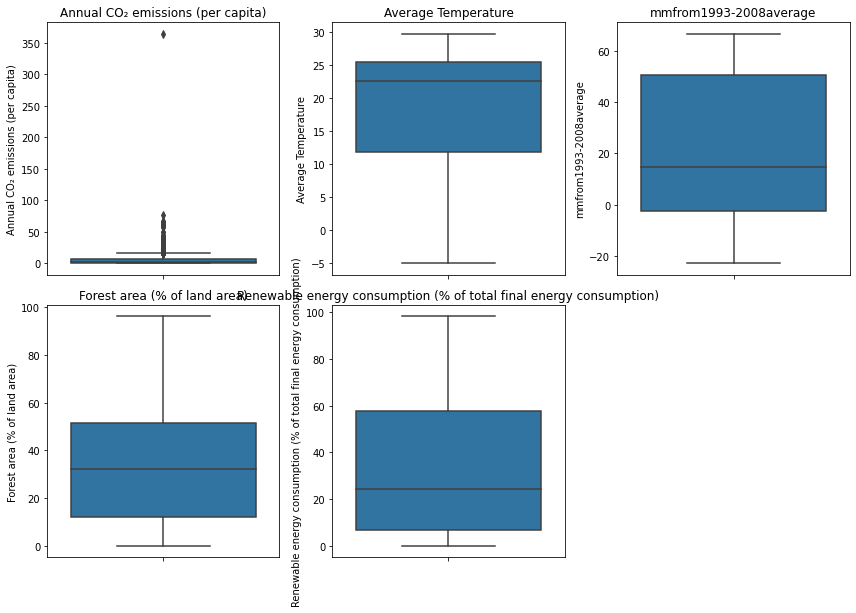

In [ ]:
# Checking for outliers 
columns_to_plt = ["Annual CO₂ emissions (per capita)", "Average Temperature", "mmfrom1993-2008average",
                   "Forest area (% of land area)", "Renewable energy consumption (% of total final energy consumption)"]

plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plt, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=climate_merged_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### Handle missing values

- using median to fill average temperatures because temperature distributions often have outliers, especially for regions with extreme climates.Median is not significantly affected by outliers.
- Using the mean per country to fill forest area of land and Reneweable energy ensures we fill missing values based on similar data points rather than a global statistic and these values are highly dependent on the country or region.

In [ ]:
climate_merged_df["Average Temperature"].fillna(climate_merged_df["Average Temperature"].median(), inplace=True)
climate_merged_df["Forest area (% of land area)"].fillna(climate_merged_df.groupby("Entity")["Forest area (% of land area)"].transform("mean"), inplace=True)
climate_merged_df["Renewable energy consumption (% of total final energy consumption)"].fillna(
    climate_merged_df.groupby("Entity")["Renewable energy consumption (% of total final energy consumption)"].transform("mean"), inplace=True
)

# Verify that missing values are handled
climate_merged_df.isnull().sum().sum()


0

#### Climate Risk Index Dataset

In [ ]:
# Load dataset
file_path = r"..\Data\Climate Change - datasets\Climate Risk Index.csv"
index_df = pd.read_csv(file_path)
index_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [ ]:
# Chaeck the shape of the dataset
index_df.shape

(182, 17)

In [ ]:
# Calculate summary statistics
index_df.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [ ]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

1) cri_rank & cri_score
- CRI score and rank measure how severely a country is affected by climate-related events.
A higher CRI rank indicates greater vulnerability to the negative impacts of climate-related disasters.

2) fatalities_per_100k_total & fatalities_rank
 - Show how deadly climate disasters are per 100,000 people.
Higher fatalities suggest regions with poor climate resilience.

3) losses_per_gdp_total & losses_per_gdp_rank
-Shows economic losses as a percentage of GDP, helping measure financial vulnerability.
If losses are high, climate events have a major economic impact in that country.

4) losses_usdm_ppp_total & losses_usdm_ppp_rank
- Shows total climate-induced economic losses in million USD.
Helps to compare how much money different countries lose due to climate-related disasters.

#### Data Cleaning

In [ ]:
# Drop the null columns
index_df = index_df.drop(['the_geom','the_geom_webmercator'],axis=1)
# Handle missing values 
index_df['losses_per_gdp__total'].fillna(index_df['losses_per_gdp__total'].median(),inplace=True)
# Drop rows with missing rw_country_code
index_df.dropna(subset=['rw_country_code'],inplace=True)
print("Cleaned dataset overview:")
print(index_df.isnull().sum())

Cleaned dataset overview:
index                        0
cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64


- The dataset has no missing values

#### Checking for Duplicates

In [ ]:
print('Number of duplicates:',index_df.duplicated().sum())

Number of duplicates: 0


Assess Climate Vulnerability: Identify how climate-related events impact health, economic growth e.t.c

Quantify Financial Risks: Measure economic losses due to climate-related disasters and forecast future risks.

Develop Risk Mitigation Strategies: Provide actionable insights to improve climate resilience and sustainability.

Enable Data-Driven Decision-Making: Utilize AI-powered models to predict the long-term effects of climate change.

Using the Climate Risk Index dataset, we provide comprehensive analysis on climate change’s impact on public health, economic stability, and global risk factors.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load and read the CSV
climate_risk_df = pd.read_csv("Data/Climate Change - datasets/Climate Risk Index.csv")


In [5]:
# Display the first few rows to understand its structure
climate_risk_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [6]:
climate_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

The dataset consists of 182 entries and 17 columns, with key information on climate risk, fatalities, and economic losses. Here’s a breakdown:

Key Observations:

1. Climate Risk Index (CRI)

cri_rank: Ranking of countries based on climate risk (lower = more vulnerable).

cri_score: Overall climate risk score (higher = more risk).

2. Health Impact (Fatalities)

fatalities_per_100k_total: Climate-related fatalities per 100,000 people.

fatalities_total: Total fatalities from climate-related events.

fatalities_rank: Ranking of countries by climate-related deaths.

3. Economic Impact

losses_per_gdp__total: Percentage of GDP lost due to climate disasters (131 non-null values, meaning some missing data).

losses_usdm_ppp_total: Total financial losses in million USD (adjusted for purchasing power parity).

losses_per_gdp__rank: Rank based on GDP losses.

4. Country Information

country: Name of the country.

rw_country_code and rw_country_name: Country identifiers (some missing values).

5. Missing Data

the_geom and the_geom_webmercator are empty (not useful for analysis).

losses_per_gdp__total has 51 missing values.


In [7]:
# Drop columns that have no useful data (the_geom and the_geom_webmercator)
climate_risk_df = climate_risk_df.drop(columns=['the_geom', 'the_geom_webmercator'])

In [8]:
# Handle missing values
# - Fill missing 'losses_per_gdp__total' with median (as it represents economic loss percentages)
climate_risk_df['losses_per_gdp__total'].fillna(climate_risk_df['losses_per_gdp__total'].median(), inplace=True)

# - Drop rows with missing country information
climate_risk_df = climate_risk_df.dropna(subset=['rw_country_code', 'rw_country_name'])

In [9]:
climate_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 181
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      179 non-null    int64  
 1   cartodb_id                 179 non-null    int64  
 2   country                    179 non-null    object 
 3   cri_rank                   179 non-null    int64  
 4   cri_score                  179 non-null    float64
 5   fatalities_per_100k_rank   179 non-null    int64  
 6   fatalities_per_100k_total  179 non-null    float64
 7   fatalities_rank            179 non-null    int64  
 8   fatalities_total           179 non-null    int64  
 9   losses_per_gdp__rank       179 non-null    int64  
 10  losses_per_gdp__total      179 non-null    float64
 11  losses_usdm_ppp_rank       179 non-null    int64  
 12  losses_usdm_ppp_total      179 non-null    float64
 13  rw_country_code            179 non-null    object 

In [10]:
# Summary statistics
climate_risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,179.0,89.368715,52.350035,0.0000,44.5000,89.0000,133.5000,181.0000
cartodb_id,179.0,90.368715,52.350035,1.0000,45.5000,90.0000,134.5000,182.0000
cri_rank,179.0,85.005587,44.816793,1.0000,45.0000,91.0000,135.0000,135.0000
cri_score,179.0,81.611508,34.653027,12.1700,52.5000,77.5000,124.5000,124.5000
fatalities_per_100k_rank,179.0,78.234637,37.988625,1.0000,45.5000,91.0000,114.0000,114.0000
fatalities_per_100k_total,179.0,0.528101,3.421780,0.0000,0.0000,0.0200,0.1250,43.6600
fatalities_rank,179.0,77.290503,37.604902,1.0000,45.5000,90.0000,114.0000,114.0000
fatalities_total,179.0,88.234637,430.798750,0.0000,0.0000,2.0000,24.5000,4317.0000
losses_per_gdp__rank,179.0,85.229050,44.845904,1.0000,45.5000,92.0000,135.0000,135.0000
losses_per_gdp__total,179.0,1.133185,7.012131,0.0001,0.0391,0.0841,0.1704,77.3694


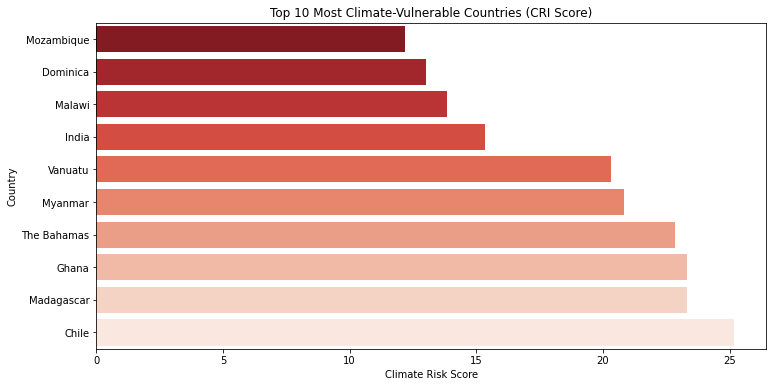

In [11]:
# Top 10 most climate-affected countries based on CRI rank
top_10_climate_risk = climate_risk_df.nsmallest(10, 'cri_rank')

# Visualization: Climate Risk Index Rankings
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_climate_risk['country'], x=top_10_climate_risk['cri_score'], palette='Reds_r')
plt.xlabel("Climate Risk Score")
plt.ylabel("Country")
plt.title("Top 10 Most Climate-Vulnerable Countries (CRI Score)")
plt.show()

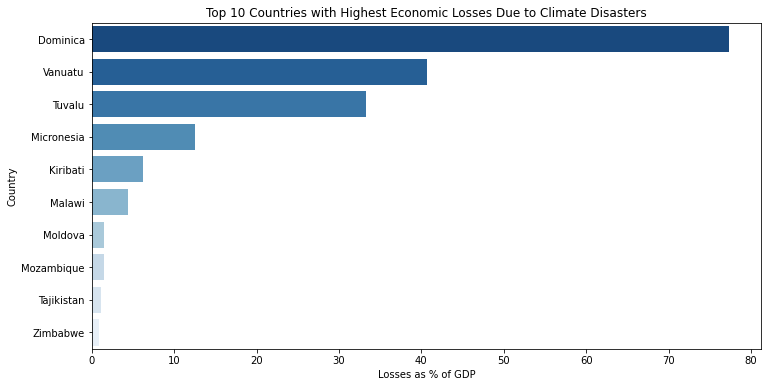

In [12]:
# Visualization: Economic Losses (Top 10 countries with highest GDP losses)
top_10_economic_losses = climate_risk_df.nlargest(10, 'losses_per_gdp__total')

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_economic_losses['country'], x=top_10_economic_losses['losses_per_gdp__total'], palette='Blues_r')
plt.xlabel("Losses as % of GDP")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Economic Losses Due to Climate Disasters")
plt.show()

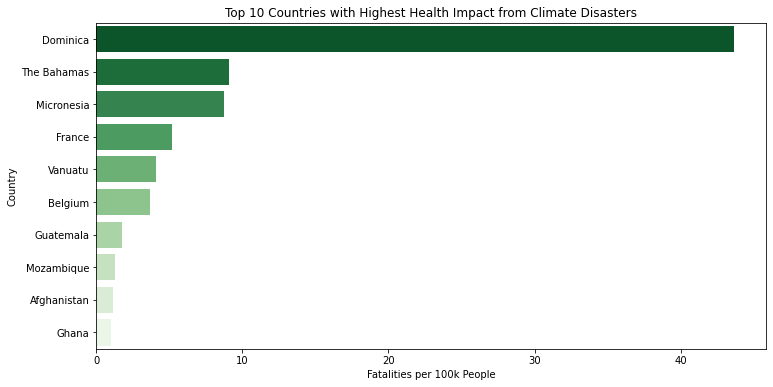

In [13]:
# Visualization: Health Impact (Top 10 countries with highest fatalities per 100k)
top_10_health_impact = climate_risk_df.nlargest(10, 'fatalities_per_100k_total')

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_health_impact['country'], x=top_10_health_impact['fatalities_per_100k_total'], palette='Greens_r')
plt.xlabel("Fatalities per 100k People")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Health Impact from Climate Disasters")
plt.show()

In [14]:
# Load and read the CSV
climate_change_df = pd.read_csv("Data/Climate Change - datasets/climate_change_dataset.csv")


In [15]:
climate_change_df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [17]:
climate_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.2+ KB


In [18]:
climate_change_df.shape

(1000, 10)

it contains global climate change indicators for multiple countries and years. Key columns include:

General Information:

Year – The year of the recorded data.

Country – Name of the country.

Climate Indicators:

Avg Temperature (°C) – Average annual temperature.

CO2 Emissions (Tons/Capita) – Per capita CO₂ emissions.

Sea Level Rise (mm) – Increase in sea levels.

Rainfall (mm) – Total annual rainfall.

Extreme Weather Events – Count of major climate-related disasters.

Economic and Environmental Factors:

Population – Total population.

Renewable Energy (%) – Share of energy from renewable sources.

Forest Area (%) – Percentage of land covered by forests.

In [19]:
# Capitalize the first letter of all column names in the dataset
climate_change_df.columns = [col.capitalize() for col in climate_change_df.columns]
climate_risk_df.columns = [col.capitalize() for col in climate_risk_df.columns]

In [20]:
climate_change_df.columns

Index(['Year', 'Country', 'Avg temperature (°c)',
       'Co2 emissions (tons/capita)', 'Sea level rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable energy (%)', 'Extreme weather events',
       'Forest area (%)'],
      dtype='object')

In [21]:
climate_risk_df.columns

Index(['Index', 'Cartodb_id', 'Country', 'Cri_rank', 'Cri_score',
       'Fatalities_per_100k_rank', 'Fatalities_per_100k_total',
       'Fatalities_rank', 'Fatalities_total', 'Losses_per_gdp__rank',
       'Losses_per_gdp__total', 'Losses_usdm_ppp_rank',
       'Losses_usdm_ppp_total', 'Rw_country_code', 'Rw_country_name'],
      dtype='object')

In [22]:
# Merge datasets based on 'Country' column
merged_df = pd.merge(climate_change_df, climate_risk_df, on="Country", how="inner")



In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         862 non-null    int64  
 1   Country                      862 non-null    object 
 2   Avg temperature (°c)         862 non-null    float64
 3   Co2 emissions (tons/capita)  862 non-null    float64
 4   Sea level rise (mm)          862 non-null    float64
 5   Rainfall (mm)                862 non-null    int64  
 6   Population                   862 non-null    int64  
 7   Renewable energy (%)         862 non-null    float64
 8   Extreme weather events       862 non-null    int64  
 9   Forest area (%)              862 non-null    float64
 10  Index                        862 non-null    int64  
 11  Cartodb_id                   862 non-null    int64  
 12  Cri_rank                     862 non-null    int64  
 13  Cri_score           

In [25]:
merged_df.isnull().sum()

Year                           0
Country                        0
Avg temperature (°c)           0
Co2 emissions (tons/capita)    0
Sea level rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable energy (%)           0
Extreme weather events         0
Forest area (%)                0
Index                          0
Cartodb_id                     0
Cri_rank                       0
Cri_score                      0
Fatalities_per_100k_rank       0
Fatalities_per_100k_total      0
Fatalities_rank                0
Fatalities_total               0
Losses_per_gdp__rank           0
Losses_per_gdp__total          0
Losses_usdm_ppp_rank           0
Losses_usdm_ppp_total          0
Rw_country_code                0
Rw_country_name                0
dtype: int64

In [27]:
merged_df.duplicated().sum()

0